# __Data Wrangling__

## __Agenda__

In this lesson, we will cover the following concepts with the help of examples:
- Introduction to Data Wrangling
- Data Collection
- Data Inspection
  * Accessing Rows Using .iloc and .loc
  * Checking for Missing Values
  * Handling Missing Data
- Dealing with Duplicates
- Data Cleaning
- Data Transformation
- Data Binning
- Handling Outliers
- Pandas Joining Techniques
    * Pandas Concatenate
    * Pandas Merge Dataframes
    * Pandas Join Dataframes
- Aggregating Data
- Reshaping Data

## __1. Introduction to Data Wrangling__
Data wrangling, also known as data munging or data preprocessing, is the process of cleaning, structuring, and transforming raw data into a format suitable for analysis.
- It is a crucial step in the data preparation pipeline, aiming to make the data more accessible, understandable, and ready for various analytical tasks.
- It involves dealing with missing values, handling outliers, transforming variables, and merging datasets, among other tasks.

![link text](https://labcontent.simplicdn.net/data-content/content-assets/Data_and_AI/ADSP_Images/Lesson_09_Data_Wrangling/Introduction.png)

## __2. Data Collection:__

Data collection is the process of gathering information from diverse sources to build a comprehensive dataset for analysis.
- Sources may include databases, APIs (Application Programming Interfaces), spreadsheets, or external files. Effective data collection ensures the availability of relevant and reliable information.

### __Loading Data:__
Start by loading data into a Pandas DataFrame.

![link text](https://labcontent.simplicdn.net/data-content/content-assets/Data_and_AI/ADSP_Images/Lesson_09_Data_Wrangling/Loading.png)

In [169]:
import pandas as pd

# Load the data
df = pd.read_csv('../data/house_prices_1.csv')

## __3. Data Inspection__
It involves exploring the dataset to gain insights into its structure and quality.
- This step involves using functions like df.head(), df.info(), and df.describe() to gain insights into the dataset's structure, data types, and statistical summaries. Checking for missing values, outliers, and inconsistencies is crucial to identify potential issues that need addressing.

In [ ]:
# Inspecting the first few rows of the DataFrame
df.head(5)

In [ ]:
# Displaying the last few rows of the DataFrame
df.tail(5)

In [ ]:
# Providing information about the DataFrame, including data types and non-null counts
print(df.shape)
info = df.info()


In [ ]:
# Displaying descriptive statistics of the DataFrame, such as mean, std, min, max, etc.
df.describe()

In [ ]:
# Displaying datatypes of the columns
df.dtypes

In [ ]:
df.columns

In [119]:
import matplotlib.pyplot as plt

def inspect_non_categorical_data(df, column):
    if not column in df.columns:
        print(f"Column {column} not found in DataFrame")
        return
    if df[column].dtype == 'object':
        print(f"Column {column} is a categorical variable")
        return
    # Look at value column data statistically
    print("\nPrice Statistics:")
    print(f"Mean value: ${df[column].mean():,.2f}")
    print(f"Median value: ${df[column].median():,.2f}")
    print(f"Standard deviation: ${df[column].std():,.2f}")
    print(f"Minimum value: ${df[column].min():,.2f}")
    print(f"Maximum value: ${df[column].max():,.2f}")
    print(f"Number of missing values: {df[column].isnull().sum()}")
    print(f"Number of zero values: {(df[column] == 0).sum()}")
    print("Data distribution:")
    print(df[column].value_counts(bins=5, normalize=True).sort_index())

    # Create a figure with subplots for different visualizations
    fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(20, 5))
    fig.suptitle(f'{column} Distribution')
    # Box plot
    df.boxplot(column=[column], ax=ax1, vert=False)
    ax1.set_ylabel(f'{column}')
    ax1.set_title(f'Box Plot of {column}')

    # Histogram with KDE
    df[column].hist(bins=50, density=True, ax=ax2)
    df[column].plot(kind='kde', ax=ax2, color='red')
    ax2.set_xlabel(f'{column}')
    ax2.set_ylabel('Density')
    ax2.set_title(f'Distribution of {column}')
    plt.tight_layout()
    plt.show()
    return

In [ ]:
# Index(['date', 'price', 'bedrooms', 'bathrooms', 'sqft_living', 'sqft_lot',
#       'floors', 'waterfront', 'view', 'condition', 'sqft_above',
#       'sqft_basement', 'yr_built', 'yr_renovated', 'street', 'city',
#       'statezip', 'country'],
for column in ['price', 'sqft_living', 'sqft_lot', 'sqft_above', 'sqft_basement']:
    print(f"Inspecting {column} column:")
    inspect_non_categorical_data(df, column)


In [121]:
def inspect_categorical_data(df, column):
    if not column in df.columns:
        print(f"Column {column} not found in DataFrame")
        return

    print(f"Inspecting {column} column:")

    # Draw a histogram of the column, annotate the value counts on top of the histogram
    counts, bins, _ = plt.hist(df[column], bins=range(0, 10), edgecolor="black", alpha=0.7)

    # Annotate each bar with its count
    for count, bin_edge in zip(counts, bins[:-1]):  # Exclude last bin edge
        plt.text(bin_edge + 0.5, count + 0.5, str(int(count)), ha='center', fontsize=12)
    plt.title(f'Histogram of {column}')
    plt.show()
    return

In [ ]:
# 'bedrooms', 'bathrooms', 'floors', 'waterfront', 'view', 'condition', 'yr_built', 'yr_renovated', 'city', 'statezip', 'country'
for column in ['bedrooms', 'bathrooms', 'floors', 'waterfront', 'view', 'condition']:
    inspect_categorical_data(df, column)

### State and zip code analysis
statezip colums is XY-NNNNN. All data is WA data. There are 715 or more zip codes in state of WA. And we have data for 77 zip codes only.

In [ ]:
# Display number of unique values in the city column
n_cities = df['city'].nunique()
# Display number of unique values in the statezip column
n_statezips = df['statezip'].nunique()
# Display number of unique values in the country column
n_countries = df['country'].nunique()
print(f"Number of unique cities: {n_cities}, statezips: {n_statezips}, countries: {n_countries}")

In [ ]:
df['state'] = df['statezip'].str[:2]
df['zip'] = df['statezip'].str[3:].str.strip()
print(f"Number of unique states: {df['state'].nunique()}, zipcodes: {df['zip'].nunique()}")
df.head(2)

### __3.1 Accessing Rows Using .iloc and .loc__
Inspecting the dataset involves exploring its content.
- Using .iloc and .loc allows you to access specific rows based on integer-location or label-based indexing, respectively.

In [ ]:
# Access the first row using iloc
result_iloc_0 = df.iloc[0]
print(result_iloc_0)

In [ ]:
# Display the result
print("Result:")
print(result_iloc_0)


In [ ]:
# Access the eleventh row using iloc
result_iloc_10 = df.iloc[10]
# Display the result for df.iloc[10]
print("Result for df.iloc[10]:")
print(result_iloc_10)

### __3.2 Checking for Missing Values__
![link text](https://labcontent.simplicdn.net/data-content/content-assets/Data_and_AI/ADSP_Images/Lesson_09_Data_Wrangling/Checking_for_missing_values.png)

In [ ]:
# Checking for missing values
missing_values = df.isnull().sum()
print("Missing Values per Column:")
print(missing_values)

In [ ]:
# Show all lines with null values for price
df[df['sqft_lot'].isnull()]

In [ ]:
# Show all lines with null values
df[df['country'].isnull()]

In [ ]:
# Show all lines with null values
df[df['price'].isnull()]

### __3.3 Handling Missing Data__
Handling missing data is crucial for maintaining data integrity. Various approaches include imputation (replacing missing values with estimated values), the removal of records with missing values, or using default values when appropriate.
![link text](https://labcontent.simplicdn.net/data-content/content-assets/Data_and_AI/ADSP_Images/Lesson_09_Data_Wrangling/Handling_missing_data.png)

__Let's check the percentage of the rows with missing value__

- We are performing this operation to determine whether the NA value rows can be dropped off or not so that we cannot deviate from our desired model

In [ ]:
percentage_of_missing_values = 100 * df.isnull().sum()/df.shape[0]
percentage_of_missing_values

<br>

__First solution: drop lines with missing values__

In [ ]:
newdf = df.dropna(axis=0)
newdf.isnull().sum()

In [ ]:
newdf.shape

<br>

__Second solution:__
- Drop lines where "price" has missing values
- Replace missing country with "USA"
- Replace missing "sqft lot" with the average sqft_lot

In [ ]:
newdf = df.copy()
newdf.head(3)

In [ ]:
# Drop lines where "price" has missing values ONLY, keep missing values for other values
newdf.dropna(subset=['price'], axis=0, inplace=True)
newdf.shape

In [ ]:
newdf.isnull().sum()

In [138]:
# Replace missing country with "USA"
import numpy as np

newdf['country'] = newdf['country'].fillna("USA")

In [ ]:
newdf.isnull().sum()

In [ ]:
# Replace missing "sqft lot" with the average sqft_lot
# First move with
avg = newdf['sqft_lot'].mean()
avg

In [141]:
# Replace
newdf['sqft_lot'] = newdf['sqft_lot'].fillna(avg)

In [ ]:
newdf.isnull().sum()

In [ ]:
newdf.shape

<br>

__Third solution:__
- Replace all numerical missing values with the mean values
- Drop all line with missing categorical values

In [ ]:
# Handling missing numerical values using imputation
df_filled = df[df.isna()]
df_filled.info()

In [ ]:
df_filled.isnull().sum()

In [ ]:
# Remove missing categorical values: view
view  = df[df['view'].isna()]
condition = df[df['condition'].isna()]
print(f"Number of missing values for view: {view.shape[0]}, condition: {condition.shape[0]}")

In [ ]:
df_filled.isnull().sum()

## __4. Dealing with Duplicates__

Duplicates in a dataset can introduce bias and errors.
- Identifying and handling duplicate records is essential for ensuring accurate analysis and reporting.

![link text](https://labcontent.simplicdn.net/data-content/content-assets/Data_and_AI/ADSP_Images/Lesson_09_Data_Wrangling/Dealing_with_duplicates.png)

In [ ]:
# Count duplicates
df.duplicated().sum()

In [ ]:
# Show duplicates
df[df.duplicated(keep=False)]

In [150]:
# Removing duplicate records, reindex the dataframe
df_no_duplicates = df.copy()
df_no_duplicates = df_no_duplicates.drop_duplicates(keep='first', ignore_index=True)

By default, `drop_duplicates()` retains the first occurrence of a duplicate and removes subsequent ones. This behavior can be changed using the `keep` parameter, if specified otherwise.

In [ ]:
df_no_duplicates.duplicated().sum()

## __5. Data Cleaning__

This includes correcting typographical errors, standardizing date formats, and resolving inconsistencies in categorical data labeling.
- Standardizing data formats and units ensures consistency and facilitates analysis.

In [ ]:
# Cleaning data by standardizing data to datetime format

df_no_duplicates['date'] = df_no_duplicates['date'].astype('datetime64[ns]')
df_no_duplicates.info()

In [ ]:
# Displaying the DataFrame after cleaning
print("DataFrame after cleaning data by standardizing formats:")
df_no_duplicates.head()

## __6. Data Transformation__

Data transformation includes converting data types, creating new features through feature engineering, and normalizing or scaling numeric values as needed.

In [ ]:
# Creating a new feature (log("price"))
# Check if 'price' column exists in the DataFrame
import numpy as np
if 'price' in df.columns:
    # Use the natural logarithm to create a new feature 'Log_Price'
    df['Log_Price'] = df['price'].apply(lambda x: 0.0 if x == 0.0 else np.log(x))
else:
    print("The 'price' column does not exist in the DataFrame.")
df.head()

In [ ]:
# Normalizing numeric values: example for the "price" value
# Check if 'price' column exists in the DataFrame
import numpy as np
if 'price' in df.columns:

    # Normalize 'price' column and create a new feature 'Normalized_Price'
    df['Normalized_Price'] = (df['price'] - df['price'].min()) / (df['price'].max() - df['price'].min())
else:
    print("The 'price' column does not exist in the DataFrame.")
df.head()

In [ ]:
# plot a histogram of df['Normalized_Price']
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 6))
plt.hist(df['Normalized_Price'], bins=10, edgecolor='black')
plt.title('Distribution of Normalized House Prices')
plt.xlabel('Normalized Price')
plt.ylabel('Frequency')
plt.grid(True, alpha=0.3)
plt.show()


In [ ]:
# Other alternative: standardizing numeric values: example for the "price" value
# Check if 'price' column exists in the DataFrame
import numpy as np
if 'price' in df.columns:

    # Normalize 'price' column and create a new feature 'Normalized_Price'
    df['Standardized_Price'] = (df['price'] - df['price'].mean()) / df['price'].std()
else:
    print("The 'price' column does not exist in the DataFrame.")
df.head()

## __7. Data Binning__
Data binning, also known as discretization, is a technique in data transformation to convert continuous numerical data into discrete bins or intervals.
- This process helps simplify the analysis of trends, handle outliers, and make data more suitable for certain types of analyses or machine learning algorithms.
- It involves grouping numeric values into predefined ranges, creating a categorical representation of the data.

In [ ]:
# Data Binning: Creating bins for the 'price' column
# Check if 'price' column exists in the DataFrame
if 'price' in df.columns:
    # Define bin edges
    bin_edges = [0, 100_000, 200_000, 300_000, 400_000, 500_000, np.inf]  # Adjust bin edges as needed

    # Define bin labels
    bin_labels = ['0-100K', '101-200K', '201-300K', '301-400K', '401-500K', '501K+']

    # Create a new categorical column 'Price_Category' based on binning
    df['Price_Category'] = pd.cut(df['price'], bins=bin_edges, labels=bin_labels, right=False)

    # Displaying the DataFrame with the new 'Price_Category' column
    print("DataFrame with Price_Category column:")

else:
    print("The 'price' column does not exist in the DataFrame.")
df.head()

In [ ]:
df['Price_Category'].value_counts()

## __8. Handling Outliers__

Outliers can significantly impact analysis and modeling. Identifying and addressing outliers is crucial for maintaining the accuracy of results.

**Winsorization:** It is the transformation of statistics by limiting extreme values in the statistical data to reduce the effect of possibly spurious outliers.

<br>

__Clipping__

In [37]:
import pandas as pd
df = pd.read_csv('../data/house_prices_1.csv')
df.head()

,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,sqft_above,sqft_basement,yr_built,yr_renovated,street,city,statezip,country
0,5/2/2014 0:00,313000.0,3,1.50,1340,7912.0,1.5,0,0,3,1340,0,1955,2005,18810 Densmore Ave N,Shoreline,WA 98133,USA
1,5/2/2014 0:00,2384000.0,5,2.50,3650,9050.0,2.0,0,4,5,3370,280,1921,0,709 W Blaine St,Seattle,WA 98119,USA
2,5/2/2014 0:00,342000.0,3,2.00,1930,11947.0,1.0,0,0,4,1930,0,1966,0,26206-26214 143rd Ave SE,Kent,WA 98042,USA
3,5/2/2014 0:00,420000.0,3,2.25,2000,8030.0,1.0,0,0,4,1000,1000,1963,0,857 170th Pl NE,Bellevue,WA 98008,USA
4,5/2/2014 0:00,550000.0,4,2.50,1940,10500.0,1.0,0,0,4,1140,800,1976,1992,9105 170th Ave NE,Redmond,WA 98052,USA


In [38]:
# Handling outliers by winsorizing
from scipy.stats.mstats import winsorize

# Check if 'price' column exists in the DataFrame
if 'price' in df.columns:
    # Winsorizing the 'price' column with limits [0.05, 0.05]
    # ie: replace values below the 5th percentile with the value of the 5th percentile
    # and replace values above the 59th percentile with the value of the 95th percentile

    df['Winsorized_Price'] = winsorize(df['price'].copy(), limits=[.05, .05])
    # Displaying the DataFrame with the winsorized column
    print("DataFrame with winsorized column:")
else:
    print("The 'price' column does not exist in the DataFrame.")
df.head()

DataFrame with winsorized column:


,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,sqft_above,sqft_basement,yr_built,yr_renovated,street,city,statezip,country,Winsorized_Price
0,5/2/2014 0:00,313000.0,3,1.50,1340,7912.0,1.5,0,0,3,1340,0,1955,2005,18810 Densmore Ave N,Shoreline,WA 98133,USA,313000.0
1,5/2/2014 0:00,2384000.0,5,2.50,3650,9050.0,2.0,0,4,5,3370,280,1921,0,709 W Blaine St,Seattle,WA 98119,USA,1190000.0
2,5/2/2014 0:00,342000.0,3,2.00,1930,11947.0,1.0,0,0,4,1930,0,1966,0,26206-26214 143rd Ave SE,Kent,WA 98042,USA,342000.0
3,5/2/2014 0:00,420000.0,3,2.25,2000,8030.0,1.0,0,0,4,1000,1000,1963,0,857 170th Pl NE,Bellevue,WA 98008,USA,420000.0
4,5/2/2014 0:00,550000.0,4,2.50,1940,10500.0,1.0,0,0,4,1140,800,1976,1992,9105 170th Ave NE,Redmond,WA 98052,USA,550000.0


<br>

__Remove samples outside the interquartile range__

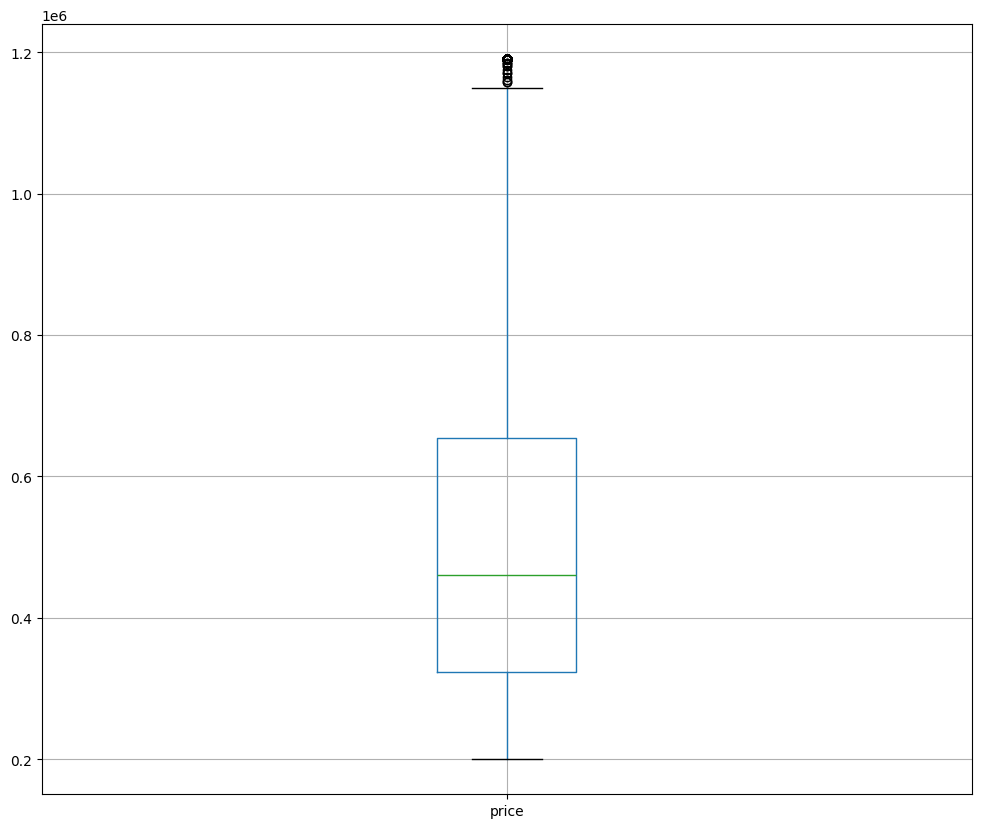

In [15]:
# Box plots
import matplotlib.pyplot as plt
plt.figure(figsize=(12,10))

#sns.boxplot(data=df,x='condition',y='price')
df.boxplot(['price'])
plt.show()

In [39]:
import numpy as np
# Remark
np.percentile(df['price'],5)

np.float64(nan)

In [40]:
np.nanpercentile(df['price'],95)

np.float64(1184050.0000000002)

In [41]:
#Create function that returnd the lower bound and upper bound of IQR
def iqr(col):
    Q1= np.nanpercentile(col, 25)
    Q3= np.nanpercentile(col, 75)
    IQR = Q3- Q1
    lower_range = Q1 - 1.5 * IQR
    upper_range = Q1 + 1.5 * IQR
    return lower_range,upper_range

In [42]:
lr,ur = iqr(df['price'])
print("Lower Range:",lr)
print("Upper Range:",ur)

Lower Range: -172293.75006250007
Upper Range: 819543.7500125


In [43]:
# Find outliers
outliers =
outliers.shape

SyntaxError: invalid syntax (331341046.py, line 2)

In [ ]:
# Remove outliers
newdf = # CODE HERE
newdf.shape

In [ ]:
# Box plots
newdf.boxplot(['price'])
plt.show()

<br>

__Remove samples outside a certain number of times the standard deviation__

In [ ]:
# Find samples such that the price deviates by more than 5 standard deviations from the mean
# CODE HERE

In [ ]:
# Remove samples such that the price deviates by more than 5 standard deviations from the mean
newdf = # CODE HERE
newdf.shape

In [ ]:
# Box plots
newdf.boxplot(['price'])
plt.show()

In [ ]:
# Remove samples such that the price deviates by more than 2 standard deviations from the mean
newdf = # CODE HERE
newdf.shape
newdf.boxplot(['price'])
plt.show()

## __9. Pandas Joining Techniques__

Pandas provides various joining techniques, such as merging, joining, and concatenating, which allow datasets to be combined using one or more keys. Each method has unique behaviors and applications.


- **Concatenate**: It appends DataFrames vertically or horizontally, offering a straightforward way to combine datasets with distinct columns or indices without regard for overlapping keys or index values.

- **Merge**: It combines DataFrames by aligning columns with shared keys, allowing for detailed control over overlapping column names and the use of multiple keys.

- **Join**: It aligns DataFrames based on their index values, making it ideal for coordinating data with corresponding indices.

These techniques are essential for integrating and analyzing different datasets. They enable a thorough understanding and help in making informed decisions in data-driven applications.

### __9.1 Pandas Concatenate__

- The __pd.concat()__ method combines DataFrames along rows or columns, preserving indices and columns.
- Specify axis=0 to concatenate along rows (vertical concatenation) or axis=1 to concatenate along columns (horizontal concatenation).

In [ ]:
df1 = pd.DataFrame(
   {
       "A": ["A0", "A1", "A2", "A3"],
       "B": ["B0", "B1", "B2", "B3"],
       "C": ["C0", "C1", "C2", "C3"],
       "D": ["D0", "D1", "D2", "D3"],
   },
   index=[0, 1, 2, 3],
)

df2 = pd.DataFrame(
   {
       "A": ["A4", "A5", "A6", "A7"],
       "B": ["B4", "B5", "B6", "B7"],
       "C": ["C4", "C5", "C6", "C7"],
       "D": ["D4", "D5", "D6", "D7"],
   },
   index=[4, 5, 6, 7],
)

df3 = pd.DataFrame(
   {
       "A": ["A8", "A9", "A10", "A11"],
       "B": ["B8", "B9", "B10", "B11"],
       "C": ["C8", "C9", "C10", "C11"],
       "D": ["D8", "D9", "D10", "D11"],
   },
   index=[8, 9, 10, 11],
)

In [ ]:
frames = [df1, df2, df3]
Result = pd.concat(frames)
print(Result)

![link text](https://labcontent.simplicdn.net/data-content/content-assets/Data_and_AI/ADSP_Images/Lesson_09_Data_Wrangling/Concatenate.png)

Here's another example illustrating concatenation along both the vertical and horizontal axes.

In [ ]:
import pandas as pd

# Create two sample DataFrames
df1 = pd.DataFrame({'A': [1, 2, 3],
                    'B': [4, 5, 6]})

df2 = pd.DataFrame({'A': [7, 8, 9],
                    'B': [10, 11, 12]})

# Concatenate along rows (stack vertically)
Result_row = pd.concat([df1, df2], axis=0)

In [ ]:
# Concatenate along columns (stack horizontally)
Result_column = pd.concat([df1, df2], axis=1)

print("\nDataframe 1:")
print(df1)
print("\nDataframe 2:")
print(df2)

print("\nConcatenated along rows:")
print(Result_row)

print("\nConcatenated along columns:")
print(Result_column)

### __9.2 Pandas Merge DataFrames__

- Utilize the  **pd.merge()** method to merge DataFrames based on specific keys or columns.
- Specify the join type in Pandas merge, which controls how rows from two DataFrames are combined.
- This ensures data alignment and prevents unintended outcomes.
- Choose the appropriate `how` parameter to specify the type of join.
- Specify the `on` parameter to indicate the column(s) to merge on.



**Types of Pandas Join**

There are various join logics available to merge Pandas DataFrames:

- Full Outer Join: It merges all rows from both DataFrames, using NaN to fill in missing values when no match is found.

- Inner Join: It combines matching rows from DataFrame 1 and DataFrame 2 based on a common key column.

- Right Join: It retains all rows from the right DataFrame, merges on common keys, and fills missing values with NaN.

- Left Join: It retains all rows from the left DataFrame, merging matching rows from the right and filling unmatched values with NaN.

- Cross: It creates the cartesian product of the rows of both frames.

In [ ]:
left = pd.DataFrame(
   {
      "key1": ["K0", "K0", "K1", "K2"],
      "key2": ["K0", "K1", "K0", "K1"],
      "A": ["A0", "A1", "A2", "A3"],
      "B": ["B0", "B1", "B2", "B3"],
   }
)
right = pd.DataFrame(
   {
      "key1": ["K0", "K1", "K1", "K2"],
      "key2": ["K0", "K0", "K0", "K0"],
      "C": ["C0", "C1", "C2", "C3"],
      "D": ["D0", "D1", "D2", "D3"],
   }
)
print("\nDataframe 1:")
print(left)
print("\nDataframe 2:")
print(right)

**Inner Join**

In [ ]:
Result = pd.merge(left, right, how="inner", on=["key1", "key2"])
print(Result)

The pictorial representation of the above output is as shown below:

![link text](https://labcontent.simplicdn.net/data-content/content-assets/Data_and_AI/ADSP_Images/Lesson_09_Data_Wrangling/merge_inner.png)

**Right Join**

In [ ]:
Result = pd.merge(left, right, how="right", on=["key1", "key2"])
print(Result)

The pictorial representation of the above output is as shown below:

![link text](https://labcontent.simplicdn.net/data-content/content-assets/Data_and_AI/ADSP_Images/Lesson_09_Data_Wrangling/merge_right.png)

**Left Join**

In [ ]:
Result = pd.merge(left, right, how="left", on=["key1", "key2"])
print(Result)

The pictorial representation of the above output is as shown below:

![link text](https://labcontent.simplicdn.net/data-content/content-assets/Data_and_AI/ADSP_Images/Lesson_09_Data_Wrangling/merge_letf.png)

**Cross**

In [ ]:
Result = pd.merge(left, right, how="cross")
print(Result)

The pictorial representation of the above output is as shown below:

![link text](https://labcontent.simplicdn.net/data-content/content-assets/Data_and_AI/ADSP_Images/Lesson_09_Data_Wrangling/merge_cross.png)

**Full Outer Join**

In [ ]:
Result = pd.merge(left, right, how="outer", on=["key1", "key2"])
print(Result)

The pictorial representation of the above output is as shown below:

![link text](https://labcontent.simplicdn.net/data-content/content-assets/Data_and_AI/ADSP_Images/Lesson_09_Data_Wrangling/outer_merge.png)


### __9.3 Pandas Join DataFrames__

- Use the __join()__ method to join DataFrames based on their indices
- Specify the `how` parameter to determine the type of join, similar to __pd.merge()__
- Use the `on` parameter if joining on specific columns, or simply call __join()__ without parameters to perform a simple index-based join




In [ ]:
left = pd.DataFrame(
    {
        "A": ["A0", "A1", "A2", "A3"],
        "B": ["B0", "B1", "B2", "B3"],
        "key": ["K0", "K1", "K0", "K1"],
    }
)
right = pd.DataFrame({"C": ["C0", "C1"],
                      "D": ["D0", "D1"]},
                      index=["K0", "K1"])

In [ ]:
Result = left.join(right, on="key")
print(Result)

The pictorial representation of the above output is as shown below:

![link text](https://labcontent.simplicdn.net/data-content/content-assets/Data_and_AI/ADSP_Images/Lesson_09_Data_Wrangling/join.png)

In [ ]:
import pandas as pd

# Assuming you have two DataFrames df1 and df2 with a common column 'common_column'
# Adjust column names and DataFrames based on your actual data

# DataFrames
df1 = pd.DataFrame({'Common_column': [1, 2, 3], 'Data1': ['A', 'B', 'C']})
df2 = pd.DataFrame({'Common_column': [2, 3, 4], 'Data2': ['X', 'Y', 'Z']})

In [ ]:
df1.head()

In [ ]:
df2.head()

In [ ]:
# Merging DataFrames based on the common column with an inner join
merged_df = #CODE HERE

In [ ]:
# Displaying the merged DataFrame
print("Merged DataFrame:")
merged_df

## __10. Aggregating Data__

Aggregating data involves summarizing or grouping data based on specific criteria. This is useful for creating meaningful insights and reducing data dimensionality.

- Common aggregation functions include average(mean), median, minimum(min), maximum(max), sum, standard deviation(std), variance(var), and count.

In [ ]:
import pandas as pd

# Assuming you have a DataFrame 'df' with a 'Category' column
# Adjust column names and DataFrame based on your actual data

# DataFrame
df = pd.DataFrame({'Category': ['A', 'B', 'A', 'B', 'A'],
                   'Value': [10, 15, 20, 25, 30]})

In [ ]:
df.head()

In [ ]:
df.groupby('Category')

In [ ]:
df.groupby('Category').count()

In [ ]:
df.groupby('Category').mean()

In [ ]:
# Grouping the DataFrame by 'Category' and calculating various aggregations
df_aggregated = df.groupby('Category').agg({
    'Value': ['mean', 'median', 'min', 'max', 'sum', 'std', 'var', 'count']
})

# Displaying the aggregated DataFrame
print("Aggregated DataFrame:")
df_aggregated

<br>

__Other example__

In [ ]:
newdf.groupby('city').count()

In [ ]:
newdf.groupby('city').count()['price'].head(7)

In [ ]:
# Remark: you can use whichever column
newdf.groupby('city').count()['date'].head(7)

In [ ]:
# ALternatively
newdf[['price','city']].groupby('city').count().head(7)

In [ ]:
citycount=newdf[['price','city']].groupby('city').count()
citycount.index

In [ ]:
city_avg_price = newdf[['price','city']].groupby('city').mean()
city_avg_price.head(7)

__Count how many houses there are for each "condition" in each "city"__

In [ ]:
# condition and city are 2 categorical variables
newdf[["condition","city"]].head(10)

In [ ]:
my_crosstab=pd.crosstab(index=newdf["city"],columns=newdf["condition"])
my_crosstab.head(10)

In [ ]:
my_crosstab.plot(kind='bar',figsize=(10,6),stacked=True,colormap='Paired')

## __11. Reshaping Data__

Reshaping data includes pivoting, melting, or stacking data to achieve a structure suitable for specific analyses or visualizations.

![link text](https://labcontent.simplicdn.net/data-content/content-assets/Data_and_AI/ADSP_Images/Lesson_09_Data_Wrangling/Reshaping_data.png)

In [ ]:
import pandas as pd

# Assuming you have a DataFrame 'df' with 'Date', 'Category', and 'Value' columns
# Adjust column names and DataFrame based on your actual data

# DataFrame
df = pd.DataFrame({'Date': ['2022-01-01', '2022-01-01', '2022-01-02', '2022-01-02'],
                   'Category': ['A', 'B', 'A', 'B'],
                   'Value': [10, 15, 20, 25]})
df

In [ ]:
# Pivoting data for better analysis
df_pivoted = df.pivot_table(index='Date', columns='Category', values='Value', aggfunc='mean')

In [ ]:
df_pivoted

## __12. Dropping, adding and renaming columns__

In [ ]:
newdf=newdf.copy()
newdf.head()

In [ ]:
# Drop column "country"
# CODE HERE
newdf.head()

In [ ]:
# Replace the name "price" with the name "House_price"
# CODE HERE
newdf.head()

In [ ]:
# Replace the name "yr_built" with the name "Year" and "statezip" with "zip"
# CODE HERE
newdf.head()

# __Assisted Practice__

## __Problem Statement:__

The complexity of the housing market can be overwhelming. For a data scientist at a real estate company, the responsibility lies in analyzing housing data to uncover insights into house prices. The goal is to comprehend the elements influencing house prices and the impact of various house features on their price. This understanding aids the company in navigating the housing market more effectively and making well-informed decisions when purchasing and selling houses.

## __Steps to Perform:__

- Understand the structure of the dataset, the types of variables, and any obvious issues in the data
- Check for duplicate entries in the dataset and decide how to handle them
- Identify and handle missing values. Decide whether to fill them in or drop them based on the context
- Apply necessary transformations to the variables. This could include scaling numerical variables or encoding categorical variables
- For continuous variables, consider creating bins to turn them into categorical variables. For example, you can bin the __YearBuilt__ feature into decades
- Identify outliers in the dataset and decide on a strategy to handle them. You can use a box plot to visualize outliers in features like __LotArea__ or __SalePrice__